# Google Trends Data Visualization

## Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

## Import Statements

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Read the Data

Download and add the .csv files to the same folder as your notebook.

In [61]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

## Data Exploration

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

### Tesla

In [62]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [63]:
df_tesla.shape

(124, 3)

In [64]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [65]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [66]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [67]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [68]:
df_unemployment.shape

(181, 3)

In [69]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [70]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [71]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [72]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [73]:
df_btc_search.shape

(73, 2)

In [74]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [75]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


In [76]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


**What do the Search Numbers mean?**


We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.



For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters used to generate the .csv data:

- "Tesla", Worldwide, Web Search

- "Bitcoin", Worldwide, News Search

- "Unemployment Benefits", United States, Web Search

## Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [77]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


Is there are missing value in the BTC price dataframe

In [78]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [79]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [80]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

To remove a missing value we can use .dropna(). The inplace argument allows to overwrite our DataFrame and means we don't have to write:

In [81]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

All the date data in our columns are in the form of strings. To convert this into a Datetime object we're going to use the Pandas .to_datetime() function.

In [82]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla.MONTH)
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search.MONTH)
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment.MONTH)
df_btc_price["DATE"] = pd.to_datetime(df_btc_price.DATE)

In [83]:
df_tesla["MONTH"].head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

Next, we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

To convert our daily data into monthly data, we're going to use the .resample() function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'. If you ever need to resample a time series to a different frequency, you can find a list of different options [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)
 (for example 'Y' for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.


In [84]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
# If we wanted the average price over the course of the month, we could use something like:
# df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()

In [85]:
df_btc_monthly.shape

(73, 2)

In [86]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


## Data Visualisation

### Notebook Formatting & Style Helpers

**Fix the Matplotlib Warning (if you see it)**

At this point, you might have seen this warning below from Matplotlib:

<img src="img/error_message.png">

This is not an error, but an FYI to be explicit about which datetime converter to use. We have a timeline on our x-axis after all. To address this simply follow the instructions in the warning message and add the following code:

In [87]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

**Adding Locator Tick Marks**

When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. This is why we have Locator helpers.

The first step is importing matplotlib.dates.  This is where all the date plotting capabilities live.

Next, we need a YearLocator() and a MonthLocator() objects, which will help Matplotlib find the years and the months. Then we also need a DateFormatter(), which will help us specify how we want to display the dates. 

Now we can go back to our chart and format where the major and minor ticks should be using the Locators.

In [88]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


# format the ticks
# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months)

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'SEARCH TREND')

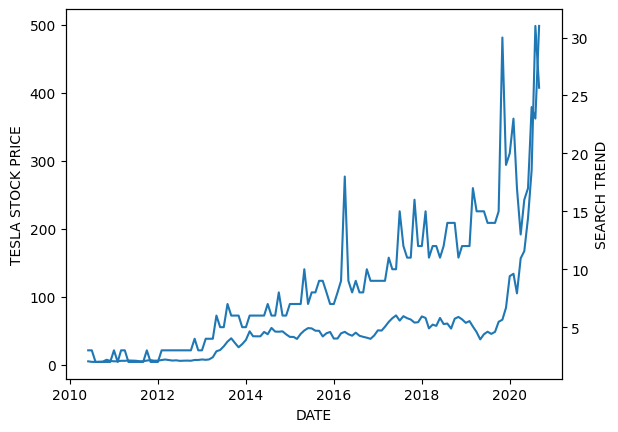

In [89]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"])
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"])

ax1.set_xlabel("DATE")
ax1.set_ylabel("TESLA STOCK PRICE")
ax2.set_ylabel("SEARCH TREND")

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'SEARCH TREND')

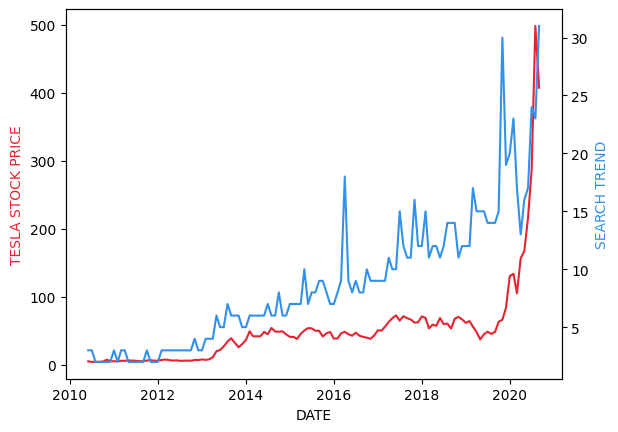

In [90]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="#E6232E")
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="#3291EB")

ax1.set_xlabel("DATE")
ax1.set_ylabel("TESLA STOCK PRICE", color="#E6232E")
ax2.set_ylabel("SEARCH TREND", color="#3291EB")

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

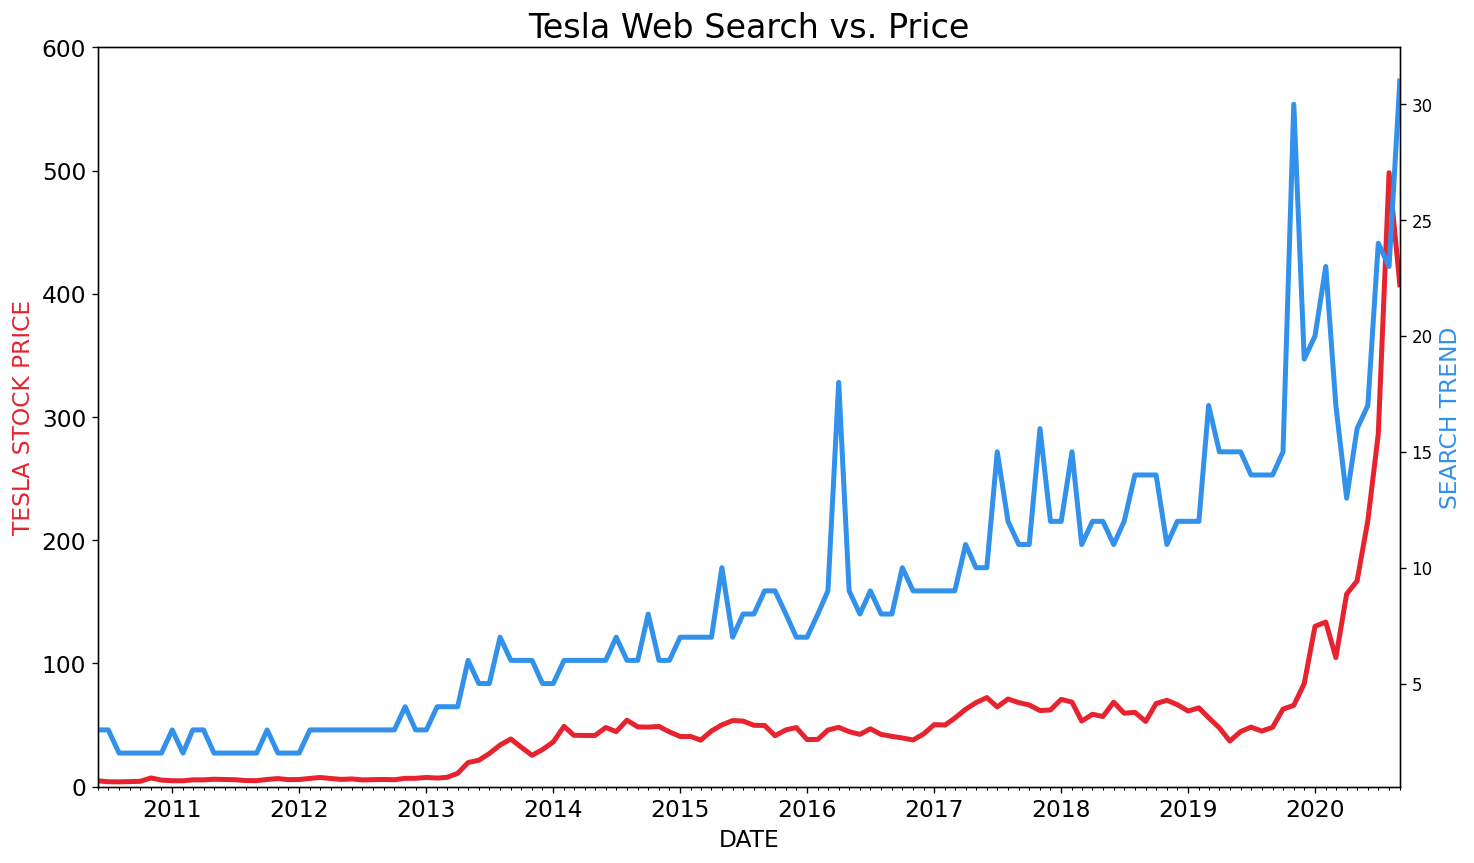

In [91]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Tesla Web Search vs. Price", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla["MONTH"].min(), df_tesla["MONTH"].max()])

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="#E6232E", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="#3291EB", linewidth=3)

ax1.set_xlabel("DATE", fontsize=14)
ax1.set_ylabel("TESLA STOCK PRICE", color="#E6232E", fontsize=14)
ax2.set_ylabel("SEARCH TREND", color="#3291EB", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

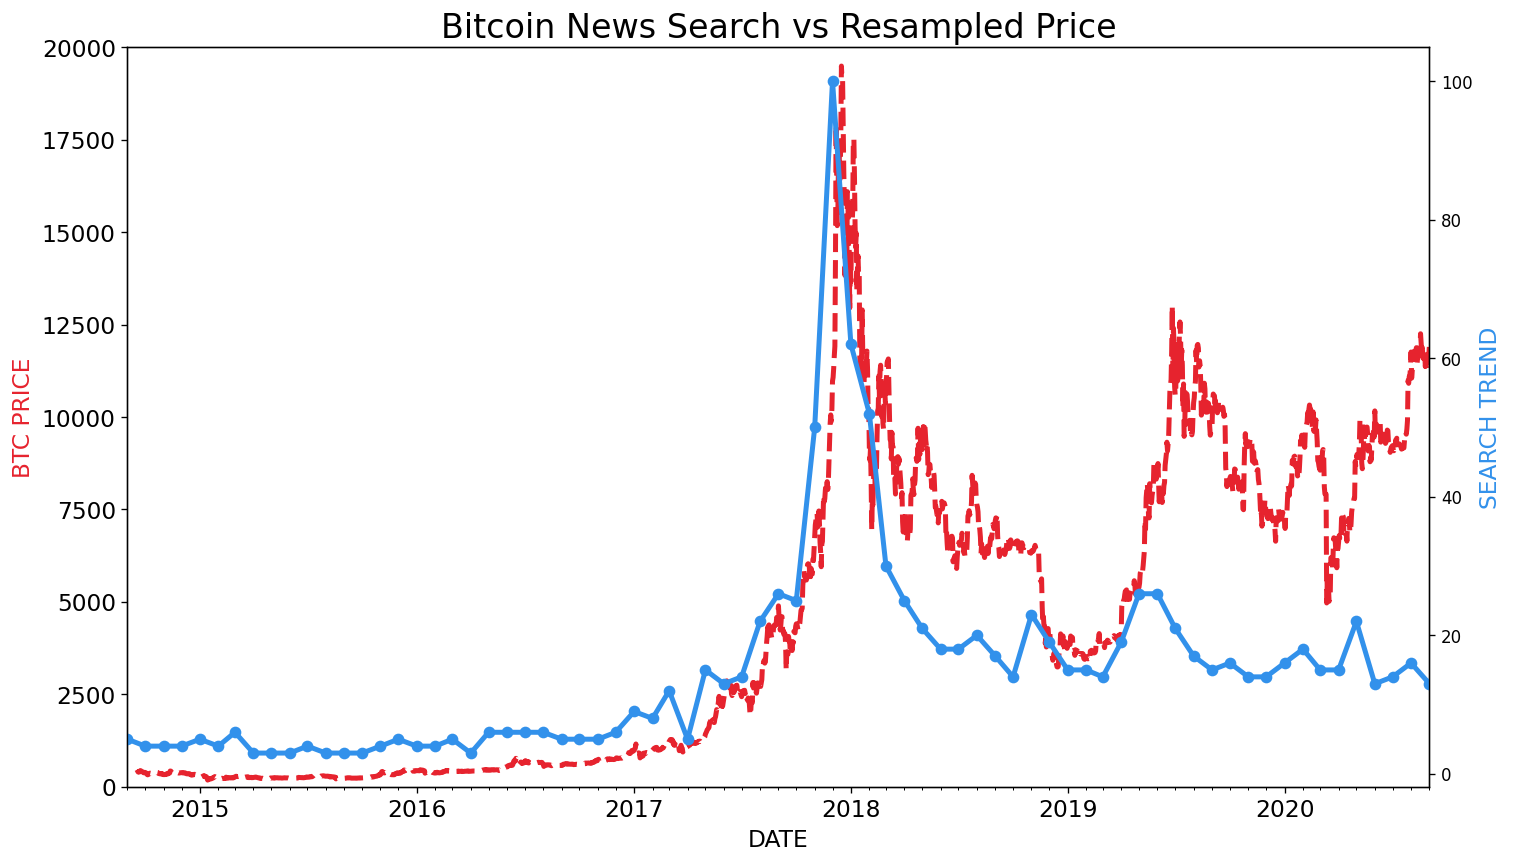

In [92]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylim([0, 20000])
ax1.set_xlim([df_btc_search["MONTH"].min(), df_btc_search["MONTH"].max()])

ax1.plot(df_btc_price["DATE"], df_btc_price["CLOSE"], color="#E6232E", linewidth=3, linestyle="dashed")
ax2.plot(df_btc_search["MONTH"], df_btc_search["BTC_NEWS_SEARCH"], color="#3291EB", linewidth=3 , marker="o")

ax1.set_xlabel("DATE", fontsize=14)
ax1.set_ylabel("BTC PRICE", color="#E6232E", fontsize=14)
ax2.set_ylabel("SEARCH TREND", color="#3291EB", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

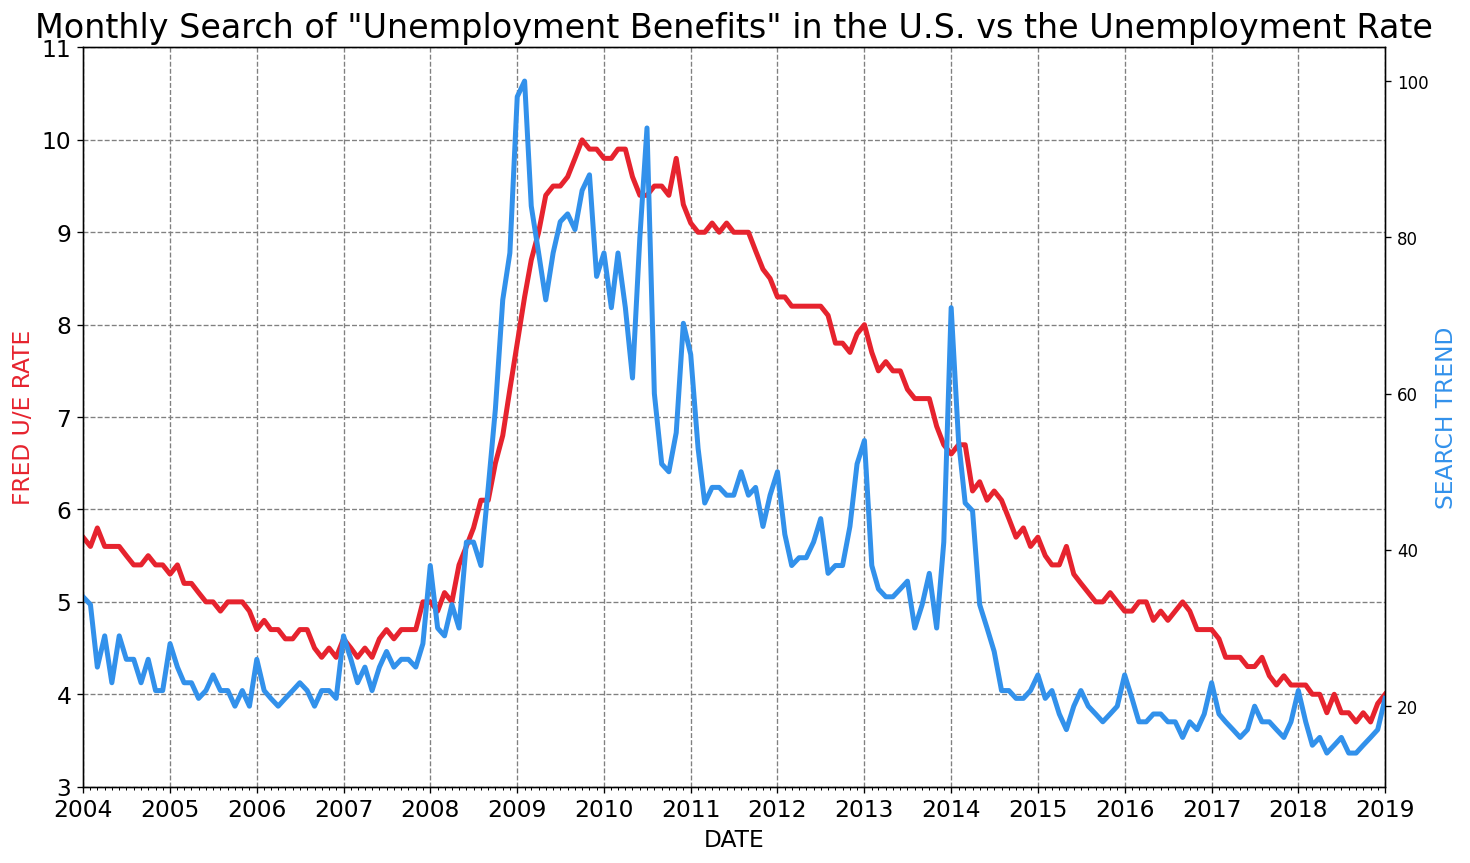

In [100]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Monthly Search of \"Unemployment Benefits\" in the U.S. vs the Unemployment Rate", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# add grid
ax1.grid(color='grey', linestyle='--')

ax1.set_ylim([3, 11])
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])

ax1.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], color="#E6232E", linewidth=3)
ax2.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], color="#3291EB", linewidth=3)

ax1.set_xlabel("DATE", fontsize=14)
ax1.set_ylabel("FRED U/E RATE", color="#E6232E", fontsize=14)
ax2.set_ylabel("SEARCH TREND", color="#3291EB", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [95]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


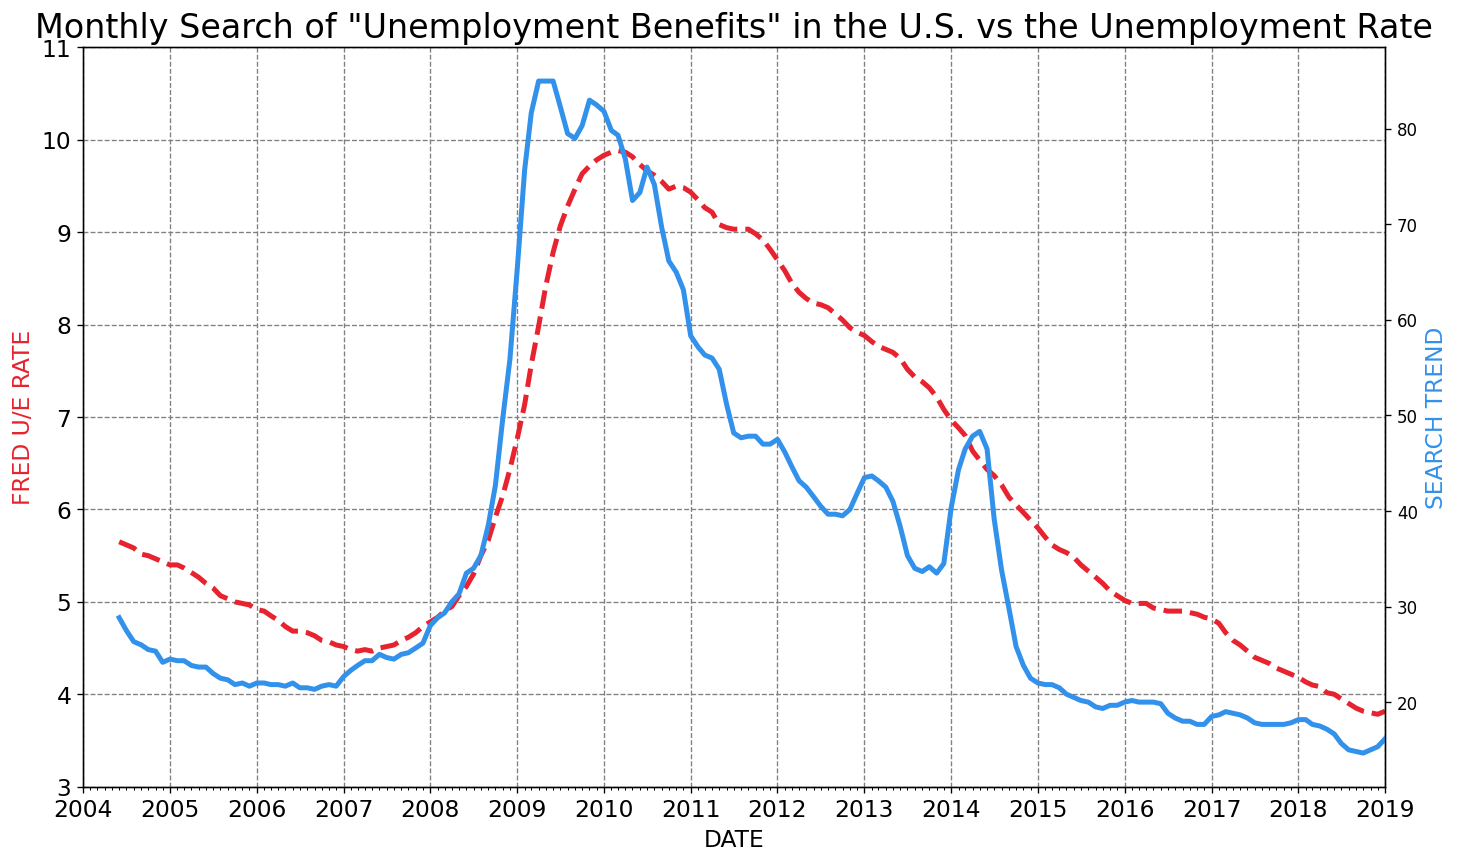

In [106]:
roll_df_unemployment = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

plt.figure(figsize=(14, 8), dpi=120)
plt.title("Monthly Search of \"Unemployment Benefits\" in the U.S. vs the Unemployment Rate", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# add grid
ax1.grid(color='grey', linestyle='--')

ax1.set_ylim([3, 11])
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])

ax1.plot(df_unemployment["MONTH"], roll_df_unemployment["UNRATE"], color="#E6232E", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment["MONTH"], roll_df_unemployment["UE_BENEFITS_WEB_SEARCH"], color="#3291EB", linewidth=3)

ax1.set_xlabel("DATE", fontsize=14)
ax1.set_ylabel("FRED U/E RATE", color="#E6232E", fontsize=14)
ax2.set_ylabel("SEARCH TREND", color="#3291EB", fontsize=14)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [111]:
recent_df_unemployment = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
recent_df_unemployment["MONTH"] = pd.to_datetime(recent_df_unemployment["MONTH"])

recent_df_unemployment["MONTH"].head()

0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

And here's the chart:

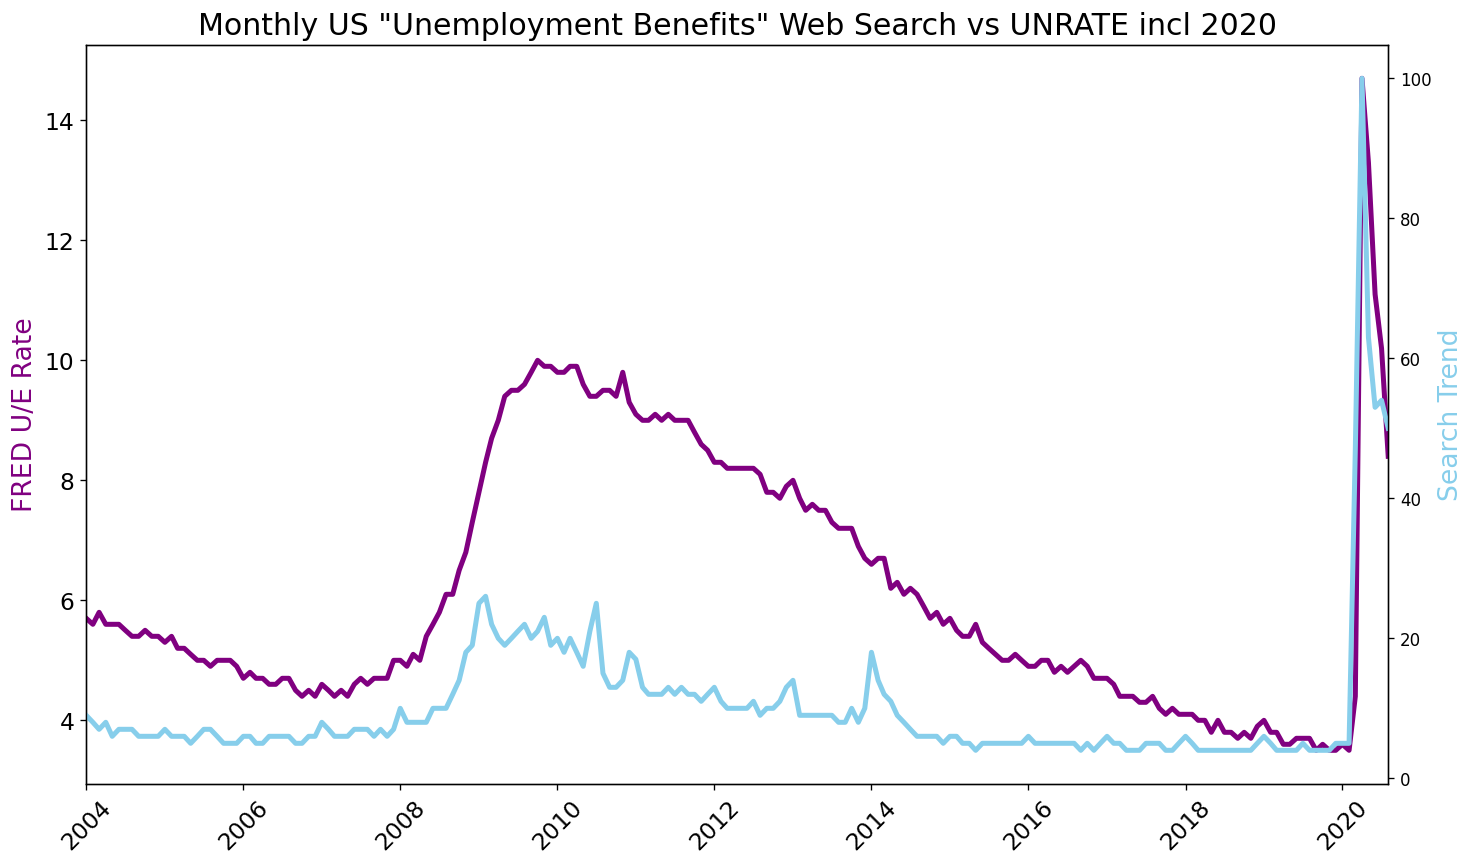

In [113]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([recent_df_unemployment["MONTH"].min(), recent_df_unemployment["MONTH"].max()])
 
ax1.plot(recent_df_unemployment["MONTH"], recent_df_unemployment["UNRATE"], 'purple', linewidth=3)
ax2.plot(recent_df_unemployment["MONTH"], recent_df_unemployment["UE_BENEFITS_WEB_SEARCH"], 'skyblue', linewidth=3)
 
plt.show()

## Learning Points & Summary

In this lesson we looked at how to:

- How to use .describe() to quickly see some descriptive statistics at a glance.

- How to use .resample() to make a time-series data comparable to another by changing the periodicity.

- How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).

- How to find the number of NaN values with .isna().values.sum()

- How to change the resolution of a chart using the figure's dpi

- How to create dashed '--' and dotted '-.' lines using linestyles

- How to use different kinds of markers (e.g., 'o' or '^') on charts.

- Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).

- Using .grid() to help visually identify seasonality in a time series.